# Affinity Propagation

creates clusters by sending messages between pairs of samples until convergence. <br>
A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples.<br>

https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation



In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_clientes = pd.read_csv("../data/processados/clientes.csv")

In [3]:
df_clientes.columns

Index(['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento',
       'PerfilInvestidor', 'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'ScoreRisco', 'P_investidor',
       'b_renda_mensal', 'b_idade', 'tempo_dinheiro_inves', 'resgate_dia',
       'inves_renda_mensal', 'possivel_renda_investida_mes'],
      dtype='object')

In [4]:
df_ml = df_clientes[['EstadoCivil', 'ScoreNivelConhecimento', 'ScoreObjetivos', 
                    'ScoreSituacaoFinanceira', 'P_investidor', 'b_renda_mensal',
                    'b_idade', 'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal',
                    'possivel_renda_investida_mes']]

In [5]:
df_ml.head()

,EstadoCivil,ScoreNivelConhecimento,ScoreObjetivos,ScoreSituacaoFinanceira,P_investidor,b_renda_mensal,b_idade,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal,possivel_renda_investida_mes
0,M,1.0,2.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",1_ano,30,10,130.0
1,S,1.0,3.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,0,20,100.0
2,C,1.0,1.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,100,10,310.0
3,S,1.0,5.0,2.0,moderado,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,0,50,1000.0
4,D,2.0,2.0,2.0,conservador,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,50,10,600.0


In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

EstadoCivil                     0
ScoreNivelConhecimento          0
ScoreObjetivos                  0
ScoreSituacaoFinanceira         0
P_investidor                    0
b_renda_mensal                  0
b_idade                         0
tempo_dinheiro_inves            0
resgate_dia                     0
inves_renda_mensal              0
possivel_renda_investida_mes    0
dtype: int64

In [18]:
df_ml.shape

(12820, 11)

In [8]:
cluster_model = ClusterModel(df_ml)

In [9]:
df_cluster, model, cluster_centers_indices, labels, n_clusters= cluster_model.affinity_propagation()

Converged after 162 iterations.


In [10]:
pickle.dump(model, open(f'../models/affinity_prop_clientes_{dt.datetime.now()}.pkl','wb'))

In [17]:
n_clusters

439

In [41]:
df_cluster.to_csv('../data/processados/affinity.csv', index= False)

In [22]:
df_cluster['cluster'].value_counts()

391    199
73     197
354    176
18     165
400    161
      ... 
249      1
62       1
81       1
376      1
0        1
Name: cluster, Length: 439, dtype: int64

In [ ]:
cl_391 = df_cluster.query('cluster == 391')

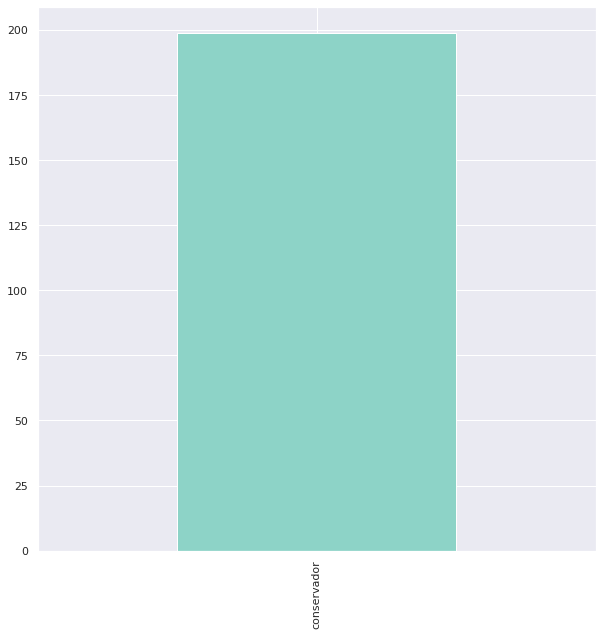

In [28]:
plt.figure(figsize=(10,10))
cl_391['P_investidor'].value_counts().plot(kind='bar')

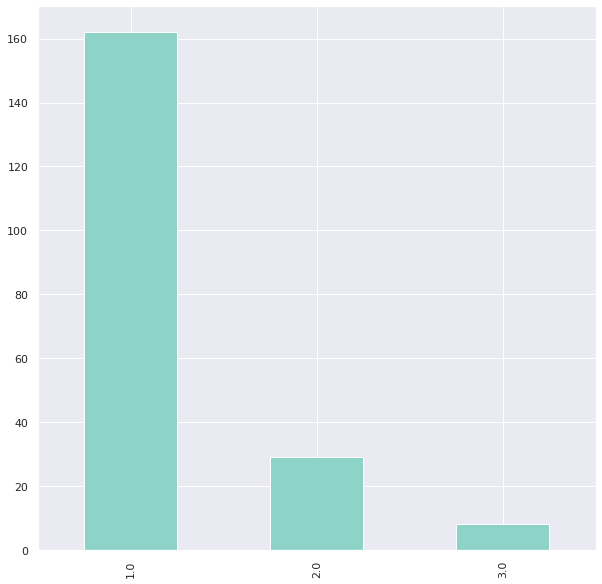

In [29]:
plt.figure(figsize=(10,10))
cl_391['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

In [33]:
cl_391.columns

Index(['EstadoCivil', 'ScoreNivelConhecimento', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'P_investidor', 'b_renda_mensal', 'b_idade',
       'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal',
       'possivel_renda_investida_mes', 'cluster'],
      dtype='object')

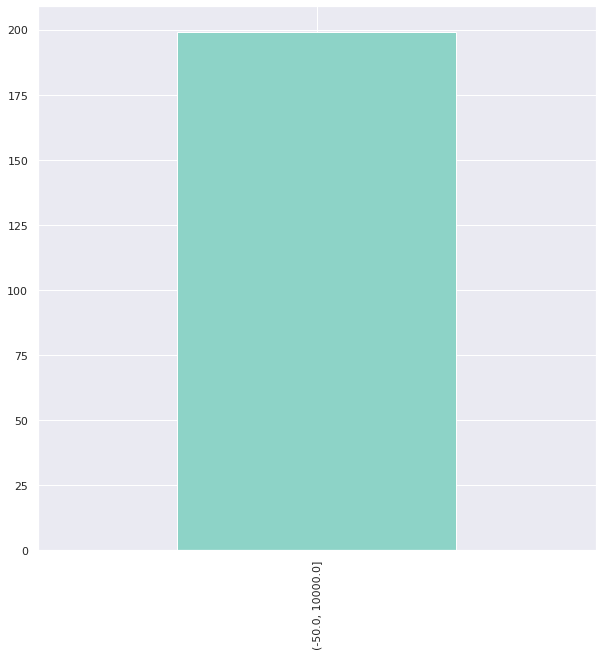

In [34]:
plt.figure(figsize=(10,10))
cl_391['b_renda_mensal'].value_counts().plot(kind='bar')

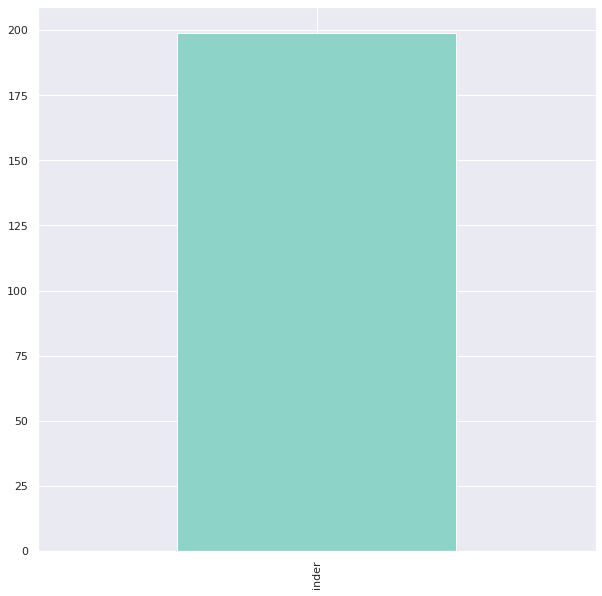

In [35]:
plt.figure(figsize=(10,10))
cl_391['tempo_dinheiro_inves'].value_counts().plot(kind='bar')

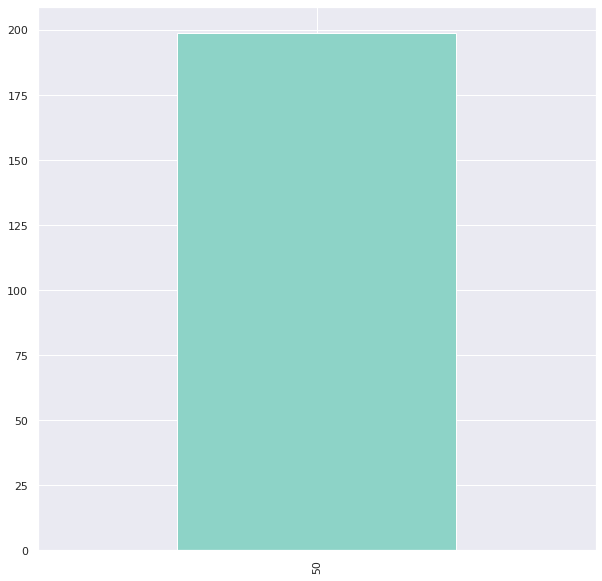

In [36]:
plt.figure(figsize=(10,10))
cl_391['resgate_dia'].value_counts().plot(kind='bar')

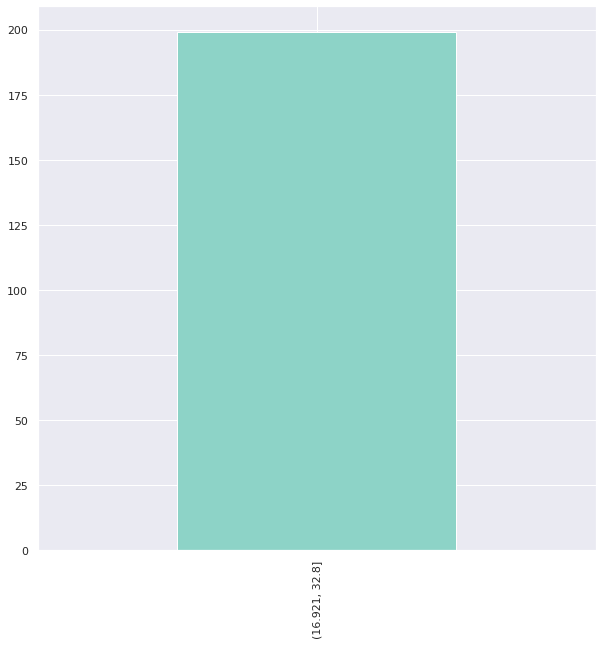

In [37]:
plt.figure(figsize=(10,10))
cl_391['b_idade'].value_counts().plot(kind='bar')

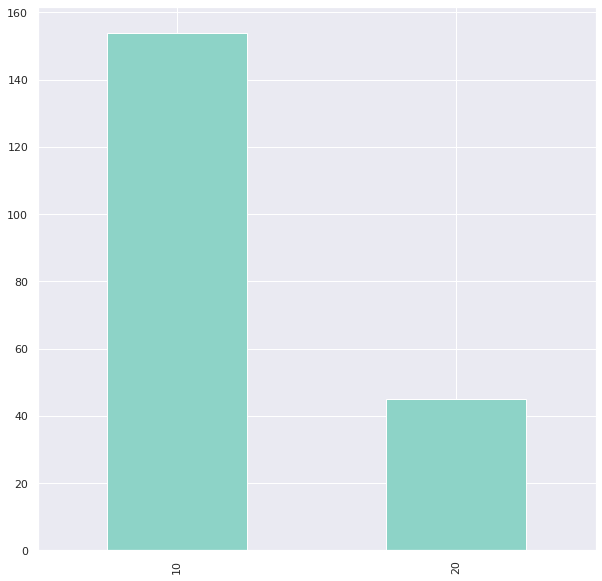

In [39]:
plt.figure(figsize=(10,10))
cl_391['inves_renda_mensal'].value_counts().plot(kind='bar')

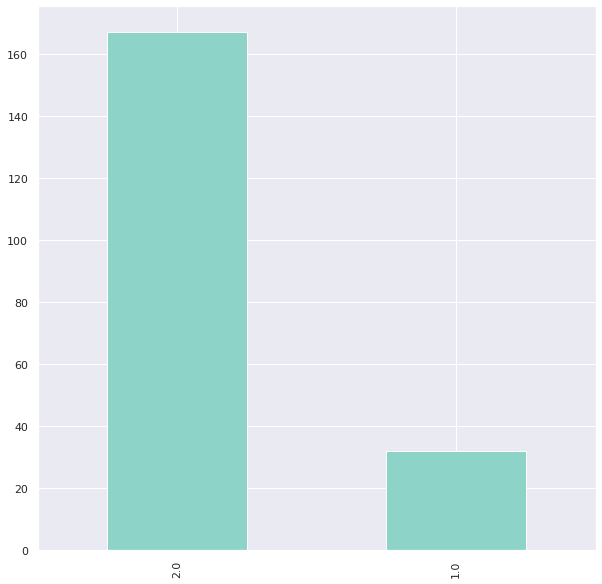

In [40]:
plt.figure(figsize=(10,10))
cl_391['ScoreObjetivos'].value_counts().plot(kind='bar')